In [66]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [67]:
import os

if not os.path.exists('thinkplot.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/blob/master/code/thinkplot.py

[1]1.

length 正比於 1/f²(因為音高與f²成正比)
length 以等速度增大時，f下降，且下降速度越來越慢

[1]2.

In [84]:
from thinkdsp import Chirp
import numpy as np

class SWTrombone(Chirp):
    def evaluate(self, ts):
        li = 1/self.start
        lf = 1/self.end
        length = np.linspace(li, lf, len(ts)-1) #因為是等速度拉，所以將length分為等大小
        freqs = 1/length #成反比
        
        dts = np.diff(ts)
        dphis = 2 * np.pi * freqs * dts
        phases = np.cumsum(dphis)
        phases = np.insert(phases, 0, 0)
        ys = self.amp * np.cos(phases)
        return ys

[1]3.

In [69]:
signal = SWTrombone(start = 220, end = 440)
TromboneWave = signal.make_wave(framerate = 15525)

[1]4.

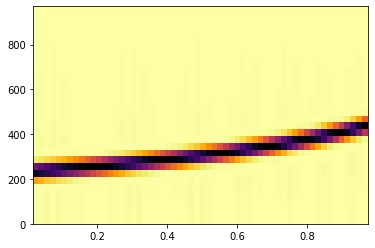

In [85]:
TromboneSpectrogram = TromboneWave.make_spectrogram(seg_length = 512)
TromboneSpectrogram.plot(high = 1000)

[2]1.

In [86]:
from thinkdsp import UncorrelatedGaussianNoise

signal = UncorrelatedGaussianNoise()
x = signal.make_wave(duration=1, framerate=10000)
x.ys.shape

(10000,)

[2]2.

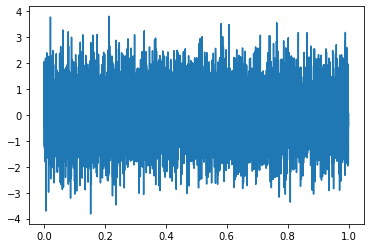

In [87]:
x.plot()

In [88]:
_max = np.max(x.ys)
_max

3.815002676063495

In [89]:
import statistics

mean=statistics.mean(x.ys)
mean

0.009616447265879893

In [90]:
std=statistics.stdev(x.ys)
std

1.0079120655045466

[2]3.

In [91]:
sx = x.make_spectrum()
sx.hs.shape

(5001,)

[2]4.

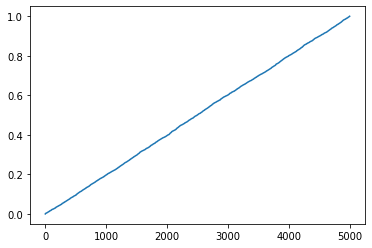

In [93]:
from thinkplot import config

integsx = sx.make_integrated_spectrum()
integsx.plot_power()

[2]5.

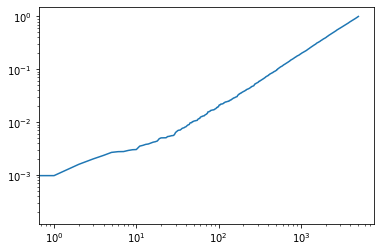

In [94]:
integsx.plot_power()
config(xscale = 'log', yscale = 'log')

[2]6.

斜率=1

[2]7.

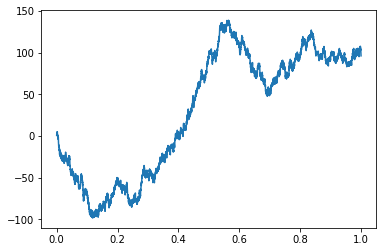

In [95]:
y = x.cumsum()
y.plot()

[2]8.

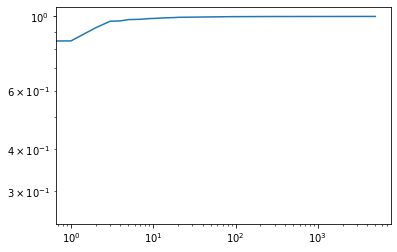

In [96]:
sy = y.make_spectrum()
integsy = sy.make_integrated_spectrum()
integsy.plot_power()
config(xscale = 'log', yscale = 'log')

f=10¹以後，圖形接近水平線，所以斜率大約為0

[2]9.

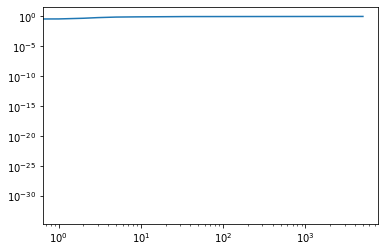

In [98]:
from thinkdsp import BrownianNoise

signal = BrownianNoise()
z = signal.make_wave(duration=1, framerate=10000)
sz = z.make_spectrum()
integsz = sz.make_integrated_spectrum()
integsz.plot_power()
config(xscale = 'log', yscale = 'log')

[2]10.

z圖形也接近水平線，故y斜率與z較接近。

Q3

[3]1.

In [99]:
aUrl = 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1588550400&interval=1d&events=history'
import pandas as pd
df = pd.read_csv(aUrl)

[3]2.

first 5 dates:
    1. 2019/5/6
    2. 2019/5/7
    3. 2019/5/8
    4. 2019/5/9
    5. 2019/5/10
last 5 dates:
    1. 2020/4/28
    2. 2020/4/29
    3. 2020/4/30
    4. 2020/5/1
    5. 2020/5/4
row number = 252 ; column number = 7

[3]3.

In [134]:
from thinkdsp import Noise

class NewNoise(Noise):
    def evaluate(self, _ys):
        self.ys = _ys
        return ys

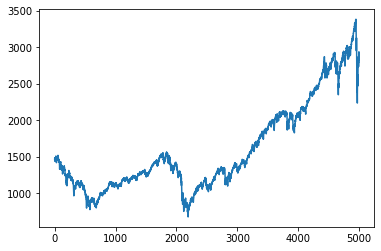

In [137]:
import matplotlib.pyplot as pl

ys= df['Close'].values
ys= ys[-5000:]
pl.plot(ys)

In [ ]:
[3]4.

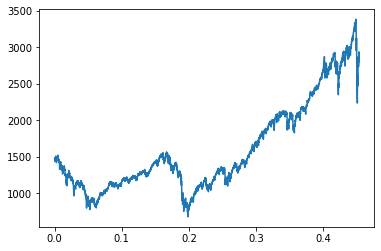

In [141]:
from thinkdsp import Wave

yWave= Wave(ys, framerate= 11025)
yWave.plot()

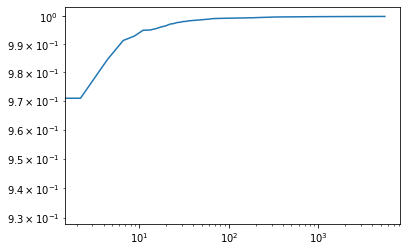

In [145]:
ySpectrum = yWave.make_spectrum()
yInteSpec = ySpectrum.make_integrated_spectrum()
yInteSpec.plot_power()
config(xscale = 'log', yscale = 'log')

斜率接近0，近似Brownie noise。